In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
def pdf(x):
    return np.cos(x)**2 

## NORMALIZZO AREA DI UNA PDF (TROVATA CON HIT OR MISS)

area non normalizzata: 2.347240951129614
parametro di normalizzazione: 0.42603210357196103
area normalizzata: 0.9937763501304959


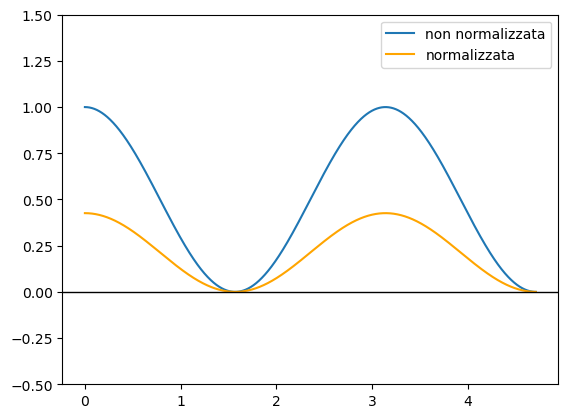

In [6]:
#per normalizzare devo calcolare l'area sottesa e poi rendere A = 1/area

from integral import integral_HOM

x = np.linspace(0, np.pi * 3/2, 10000) #valori asse x
y = pdf(x) #valori asse y
y_lim = np.max(y) #prendo il massimo di y per effettuare hit or miss
Area, std_dev = integral_HOM(pdf, 0, 3/2 * np.pi, y_lim, 10000) #trovo l'area della pdf

A = 1./Area

def pdf2(x, A = 1./Area):
    return pdf(x) * A
 
y = pdf(x)
y2 = pdf2(x)

Area2, std_dev2 = integral_HOM(pdf2, 0, 3/2 * np.pi, np.max(y2), 10000) #trovo area pdf2

print(f'area non normalizzata: {Area}')
print(f'parametro di normalizzazione: {A}')
print(f'area normalizzata: {Area2}')

fig,ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(x, y, label = 'non normalizzata')
ax.plot(x, y2, color = 'orange', label = 'normalizzata')
ax.set_ylim(-0.5, 1.5) #allontano per far vedere meglio
plt. axhline(y = 0, color = 'black', linewidth = 1) #linea per far vedere da dove integro
ax.legend();

## GENERO 10000 EVENTI CHE SEGUANO LA PDF NORMALIZZATA (CON TAC)

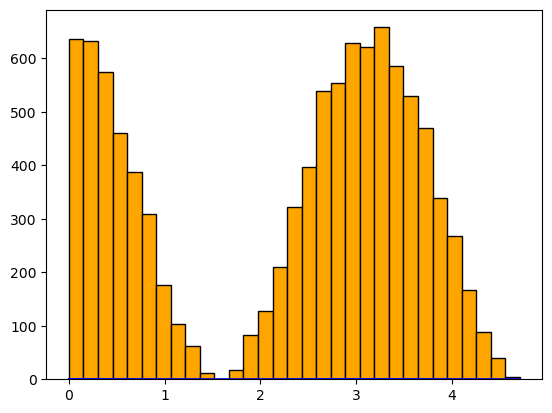

In [7]:
from myrand import generate_TAC
from mix import sturges

valori = generate_TAC(pdf2, 0, 3/2 * np.pi, np.max(y2), 10000) #genero 10000 valori e prendo quelli sottesi a pdf2
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(x, y2, color = 'blue')
n_bins = sturges(len(valori)) #calcolo il numero di bin
bin_edges = np.linspace(0, 3/2 * np.pi, n_bins) #calcolo le delimitazioni dei bin
ax.hist(valori, bin_edges, color = 'orange', edgecolor = 'black'); 

## CALCOLA MEDIA, DEV STD, ASIMMETRIA E CURTOSI DEGLI EVENTI

In [9]:
from stats import stats
valori_stats = stats(valori)
mean = valori_stats.mean()
dev_std = valori_stats.sigma()
kurt = valori_stats.kurtosis()
skew = valori_stats.skewness()

print(f'media: {mean}\ndeviazione standard = {dev_std}\nasimmetria = {skew}\ncurtosi = {kurt}')

media: 2.247431880365542
deviazione standard = 1.3620745200673385
asimmetria = -0.4026645520661185
curtosi = -1.3555602059816279


## SI MOSTRI CHE VALE IL TLC E GENERA EVENTI CON LA TECNICA APPLICATA ALLA DISTRIBUZIONE DELLA PDF NORMALIZZATA

funziona con un numero N di ripetizioni alto,
se eventi hanno media e devstd finite e sono distribuiti identicamente

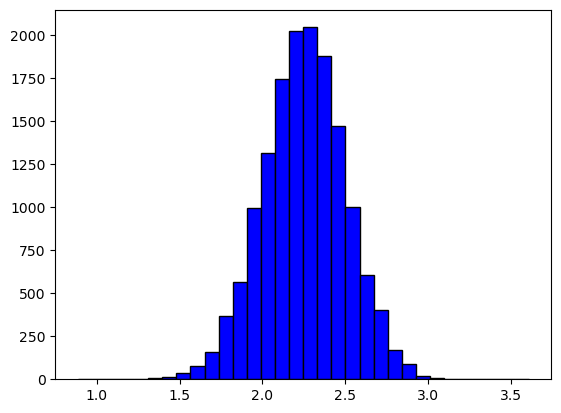

In [10]:
meanz = []
N_to = 15000
for i in range (N_to):
  val = generate_TAC(pdf2, 0, 3/2 * np.pi, np.max(y2), 30)
  val_stats = stats(val)
  mm = val_stats.mean()
  meanz.append(mm)
fig, ax = plt.subplots(nrows = 1, ncols = 1)
n_binz = sturges(len(meanz))
bin_edgez = np.linspace(mean - dev_std, mean + dev_std, n_binz);
ax.hist(meanz, bin_edgez, color = 'blue', edgecolor= 'black');
mi = np.min(meanz)
ma = np.max(meanz)

# Confronto l'istogramma con una gaussiana

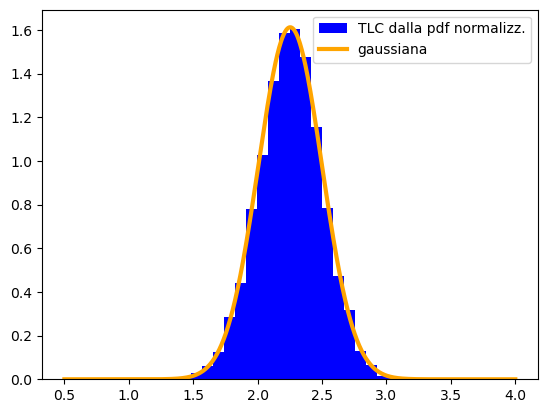

In [21]:
from scipy.stats import norm
from myrand import generate_TCL
test = generate_TCL(mi, ma, 10000)

mean_stats = stats(meanz)
meann = mean_stats.mean()
ssigma = mean_stats.sigma()

x = np.linspace(0.5, 4, 1000)
tezt = norm.pdf(x, meann, ssigma)

fig, ax = plt.subplots(nrows = 1, ncols = 1);
ax.hist(meanz, bin_edgez, label = 'TLC dalla pdf normalizz.', color = 'blue', density = True);
ax.plot(x, tezt, label = 'gaussiana', color = 'orange', linewidth = 3)
ax.legend();

dal grafico è evidente che la distribuzione sia gaussiana